In [1]:
import quaternion
import numpy as np
import shapely
from shapely.geometry import Polygon

/Users/reona/workspace_local/randoor/.venv/lib/python2.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from randoor import geometric_utils

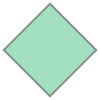

In [3]:
points = geometric_utils.get_square_horizon((0,0), 1, np.pi/4)
Polygon(points)

In [4]:
geometric_utils.add_dimension(np.arange(9).reshape((3,3)), 0)

array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

In [5]:
from randoor.spawner import poly

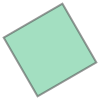

In [6]:
area_points = geometric_utils.get_square_horizon((0,0), 10, np.pi/6)
area_poly = Polygon(area_points)
area_poly

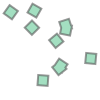

In [7]:
from shapely.ops import unary_union
xy, yaw, polys = poly.sprinkle_cube(area_poly, 10, 2)
mulp = unary_union(polys)
mulp

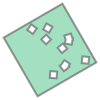

In [8]:
Polygon(area_points, [p.exterior.coords for p in mulp.geoms])

In [10]:
from sklearn.cluster import DBSCAN
eps = 3
points = np.array([p.centroid.coords[0] for p in polys])
db = DBSCAN(eps=eps, min_samples=1).fit(points)
db.labels_

array([0, 1, 2, 3, 0, 4, 0, 5, 1, 6])

In [11]:
from trimesh.convex import hull_points
hull_points(polys[0].exterior.coords)

array([[4.4076083 , 1.9329679 ],
       [6.36990788, 1.54647035],
       [6.75640544, 3.50876993],
       [4.79410586, 3.89526748]])

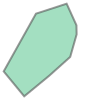

In [12]:
pp = np.array(polys)
hpoints = np.concatenate([p.exterior.coords for p in pp[db.labels_==0]])
hull = hull_points(hpoints)
Polygon(hull)

In [15]:
from trimesh.path.polygons import sample
face_size = 0.001
factor = 1 / face_size
face = Polygon(area_poly.buffer(face_size).exterior.coords, [area_poly.exterior.coords])
sample(face, 2, factor=factor)

array([[  0.90352258, -11.0264715 ]])

In [16]:
from randoor.spawner import geom
geom.sample_from_faces([area_poly], 5, face_size)

array([[[ 5.2987331 , 10.82264163],
        [-7.0007073 ,  7.50596542],
        [10.68994163, -5.37589623],
        [-5.04090478,  8.63733479],
        [ 5.84998942,  9.86871773]]])

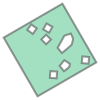

In [23]:
zone_polys, zone_hull = poly.get_clustered_zones(polys, 3)
Polygon(area_poly.exterior.coords, [p.exterior.coords for p in zone_hull])